# __Image Classification Using CNN__

Let's see a working example of training a convolutional neural network (CNN) on a dataset of flower images.

## Steps to be followed:

1. Import the necessary libraries and dataset
2. Count and retrieve the images
3. Create a training dataset
4. Create a validation dataset
5. Visualize a subset of images from the training dataset
6. Preprocess and normalize the training dataset
7. Create a convolutional neural network model with data augmentation
8. Summarize and compile the model
9. Train the model
10. Visualize the result
11. Predict the class of a given image

### Step 1: Import the necessary libraries and dataset
- Import the required libraries.
- Import the given dataset using the link provided.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [21]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir) / "flower_photos"

In [22]:
data_dir

PosixPath('/Users/xyz-ai/.keras/datasets/flower_photos/flower_photos')

### Step 2: Counting and Retrieving the Images
- Count the number of images in the directory specified by **data_dir** and print the count
- Retrieve the file paths of the images in the **roses** subdirectory and display the first two images
- Retrieve the file paths of the images in the __tulips__ subdirectory and display the first image

In [23]:
image_count = len(list(data_dir.glob('**/*.jpg')))
print(image_count)

3670


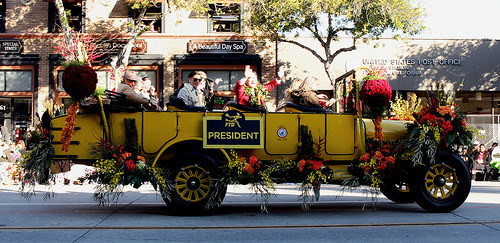

In [24]:
roses = list(data_dir.glob('**/roses/*'))
PIL.Image.open(str(roses[0]))

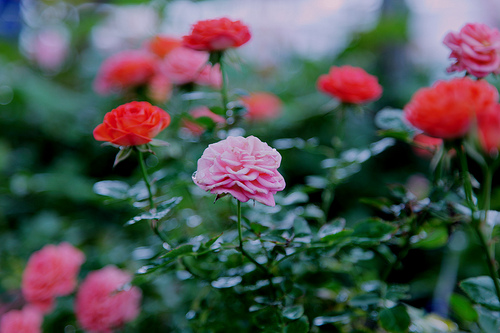

In [25]:
PIL.Image.open(str(roses[1]))

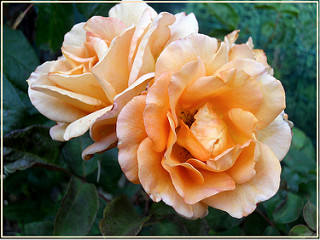

In [26]:
PIL.Image.open(str(roses[2]))

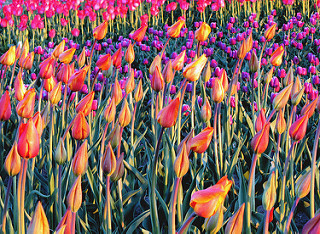

In [27]:
tulips = list(data_dir.glob('**/tulips/*'))
PIL.Image.open(str(tulips[0]))

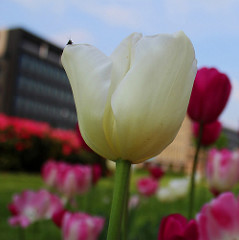

In [28]:
PIL.Image.open(str(tulips[1]))

### Step 3: Creating a Training Dataset
- Set the batch size, image height, and image width variables
- Create a training dataset using **tf.keras.utils.image_dataset_from_directory()** function, passing the following parameters:
  - __data_dir:__ The directory containing the image dataset
  - **validation_split**: The fraction of data to reserve for validation
  - **subset**: Specify the subset of the dataset to use (in this case, training)
  - **seed**: Random seed for shuffling the data
  - **image_size**: The desired size for the images in the dataset
  - **batch_size**: The number of samples per batch


In [29]:
batch_size = 32
img_height = 180
img_width = 180


train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


__Observation:__
- The **train_ds** object representing the training dataset.

### Step 4: Create a validation dataset
- Create a validation dataset using **tf.keras.utils.image_dataset_from_directory()** function, passing the following parameters:
  - __data_dir:__ The directory containing the image dataset
  - **validation_split**: The fraction of data to reserve for validation
  - **subset**: Specify the subset of the dataset to use (in this case, validation)
  - **seed**: Random seed for shuffling the data
  - **image_size**: The desired size for the images in the dataset
  - **batch_size**: The number of samples per batch

In [30]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


__Observation:__
- The __val_ds__ object representing the validation dataset.

### Step 5: Visualize a subset of images from the training dataset
- Obtain the class names from the train_ds dataset using the class_names attribute.
- Print the **class_names** to display the list of class labels.
- Import the **matplotlib.pyplot** module for visualization purposes.
- Create a figure with a size of 10x10 using **plt.figure(figsize=(10, 10)).**
- Iterate over the first batch of images and labels in the **train_ds** dataset using **train_ds.take(1).**
- For each image in the batch (up to 9 images), create a subplot using **plt.subplot(3, 3, i + 1).**
- Display the image using **plt.imshow(images[i].numpy().astype("uint8")).**
- Set the title of the subplot to the corresponding class name using **plt.title(class_names[labels[i]]).**
- Disable the axis labels for the subplot using __plt.axis("off")__.

In [31]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


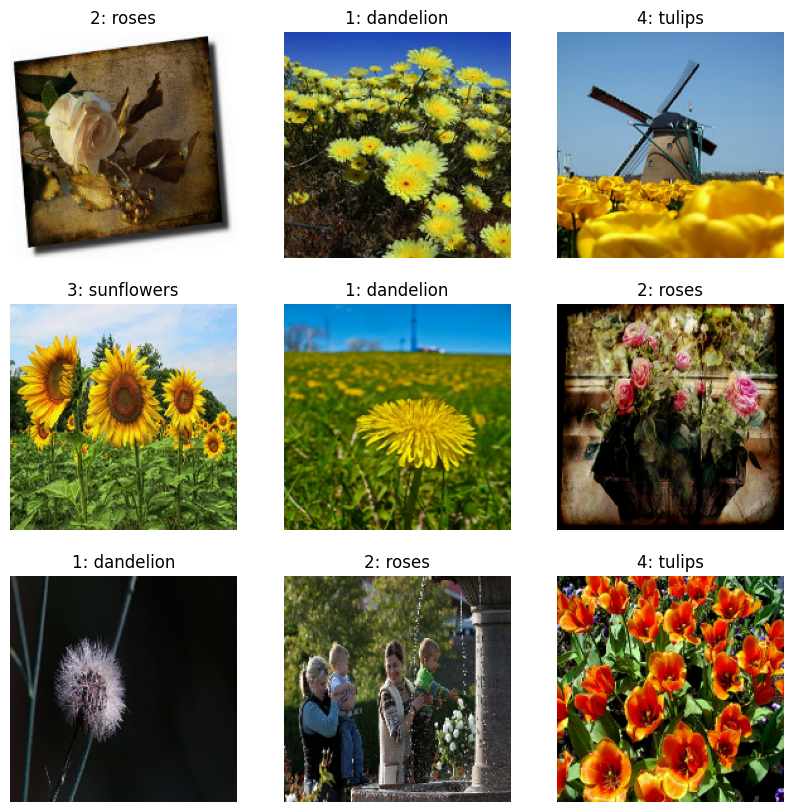

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    im_title = str(int(labels[i]))+": "+class_names[labels[i]]
    plt.title(im_title)
    plt.axis("off")

__Observation:__
- The grid of nine subplots provides a visual representation of images from the training dataset and their respective class labels. This arrangement allows for easy comparison and analysis of the various image classes within the dataset.

### Step 6: Preprocess and normalize the training dataset
- Set the value of **AUTOTUNE** to **tf.data.AUTOTUNE.**
- Cache the **train_ds** dataset for improved performance by calling the **cache()** method.
- Shuffle the elements of the **train_ds** dataset using a buffer size of **1000** by calling the **shuffle()** method.
- Prefetch the elements of the **train_ds** dataset for improved performance by calling the **prefetch()** method with **buffer_size=AUTOTUNE.**
- Cache the **val_ds** dataset for improved performance by calling the **cache()** method.
- Prefetch the elements of the **val_ds** dataset for improved performance by calling the **prefetch()** method with **buffer_size=AUTOTUNE.**
- Create a __Rescaling__ layer to normalize the pixel values of the dataset images to the range **[0, 1].**
- Apply the __normalization_layer__ to the **train_ds** dataset using the **map()** method and **lambda** function.
- Retrieve a batch of images and labels from the normalized dataset using next**(iter(normalized_ds)).**
- Access the first image in the batch using **image_batch[0].**
- Print the minimum and maximum pixel values of the first image using **np.min(first_image)** and __np.max(first_image)__.


In [33]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [34]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))


0.0 1.0


__Observation:__
- The range of pixel values in the normalized dataset ensures that the minimum value is 0 and the maximum value is 1 for the first image. This normalization process allows for consistent and standardized pixel values, facilitating easier comparisons and computations in subsequent analysis.

### Step 7: Create a convolutional neural network model with data augmentation
- Create a data augmentation pipeline using **keras.Sequential** with three augmentation layers: random horizontal flip, random rotation, and random zoom.
- Determine the number of classes based on the **class_names.**

In [35]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Create the following sequential model:
- Layer 1: Data augmentation
- Layer 2: rescaling layer.
- Layer 3: convolutional: number of filters = 16, filter_size=3, padding = same, with relu activation
- Layer 4: Maxpool: pool size = 2, valid padding, stride =2
- Layer 5: convolutional: number of filters = 32, filter_size=3, padding = same, with relu activation
- Layer 6: Maxpool: pool size = 2, valid padding, stride =2
- Layer 7: convolutional: number of filters = 64, filter_size=3, padding = same, with relu activation
- Layer 8: Maxpool: pool size = 2, valid padding, stride =2
- Dropout with dropoing 20% of nodes
- Layer 9: Flatten
- Layer 10: Dense, 128 nodes, relu activation
- Layer 11: Dense, proper number of nodes, no activation

In [43]:
num_classes = len(class_names)
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])


/Users/xyz-ai/Developer/python3-code/ml/.venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


__Observation:__
- The output of this code is a convolutional neural network model with data augmentation, suitable for image classification tasks.

### Step 8: Summarize and compile the model
- Display the summary of the model architecture and the number of parameters


In [44]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

- Compile the model with the specified optimizer, loss function, and metrics.

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

__Observation:__
- The summary of the model architecture and the compiled model can be seen as output.

### Step 9: Train the Model
- Set the number of epochs to 3
- Train the model using the fit method, passing the training and validation datasets, and the number of epochs

In [47]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.6468 - loss: 0.9159 - val_accuracy: 0.6158 - val_loss: 0.9300
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.6812 - loss: 0.8570 - val_accuracy: 0.6717 - val_loss: 0.8093
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.6930 - loss: 0.8123 - val_accuracy: 0.6866 - val_loss: 0.8319
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.7164 - loss: 0.7577 - val_accuracy: 0.6798 - val_loss: 0.8184
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.7215 - loss: 0.7309 - val_accuracy: 0.6975 - val_loss: 0.7725
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.7310 - loss: 0.7010 - val_accuracy: 0.6757 - val_loss: 0.8377
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.7553 - loss: 0.6534 - val_accuracy: 0.7248 - val_loss: 0.7524
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.7672 - loss: 0.6344 - val_accuracy: 0.69

__Observation:__
- The training history object provides valuable information about the training process, including the loss and accuracy values for each epoch. This object allows us to track the performance of the model over time and analyze how the loss and accuracy metrics evolve during training.

### Step 10: Visualize the result
- Retrieve the accuracy and loss values from the training history
- Create a range of epochs
- Plot the training and validation accuracy in a subplot
- Plot the training and validation loss in a subplot
- Display the plotted figures

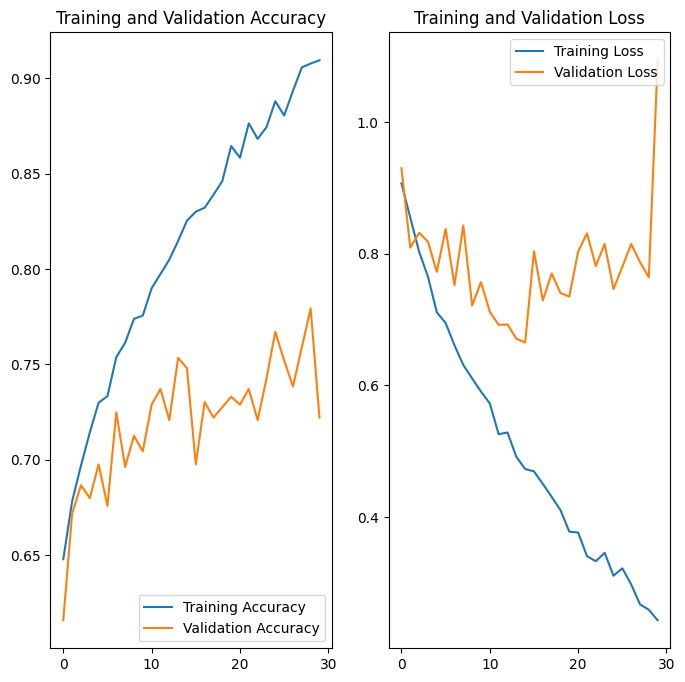

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

__Observation:__
- Two subplots displaying the training and validation accuracy, and the training and validation loss over the range of epochs.

### Step 11: Predict the class of a given image
- Define the URL of the image and download it using **tf.keras.utils.get_file().**
- Load the image and resize it to the desired target size.
- Convert the image to an array and expand its dimensions to create a batch.
- Make predictions on the image using the trained model.
- Calculate the softmax scores and identify the class with the highest confidence.
- Print the predicted class and its corresponding confidence percentage.

117948/117948 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
This image most likely belongs to sunflowers with a 100.00 percent confidence.


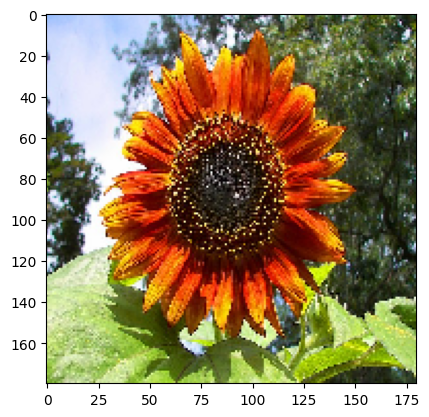

In [49]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

plt.imshow(img)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [54]:
def test_data_set(data_set):
    plt.figure(figsize=(10, 10))
    for images, labels in data_set.take(1):
        for i in range(9):

            img=images[i]
            img_array = tf.keras.utils.img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)
            predictions = model.predict(img_array, verbose=0)
            score = tf.nn.softmax(predictions[0])

            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            im_title = "\n"+"Exact:"+class_names[labels[i]]+"\n"+"Predicted:"+class_names[np.argmax(score)]
            plt.title(im_title)
            plt.axis("off")

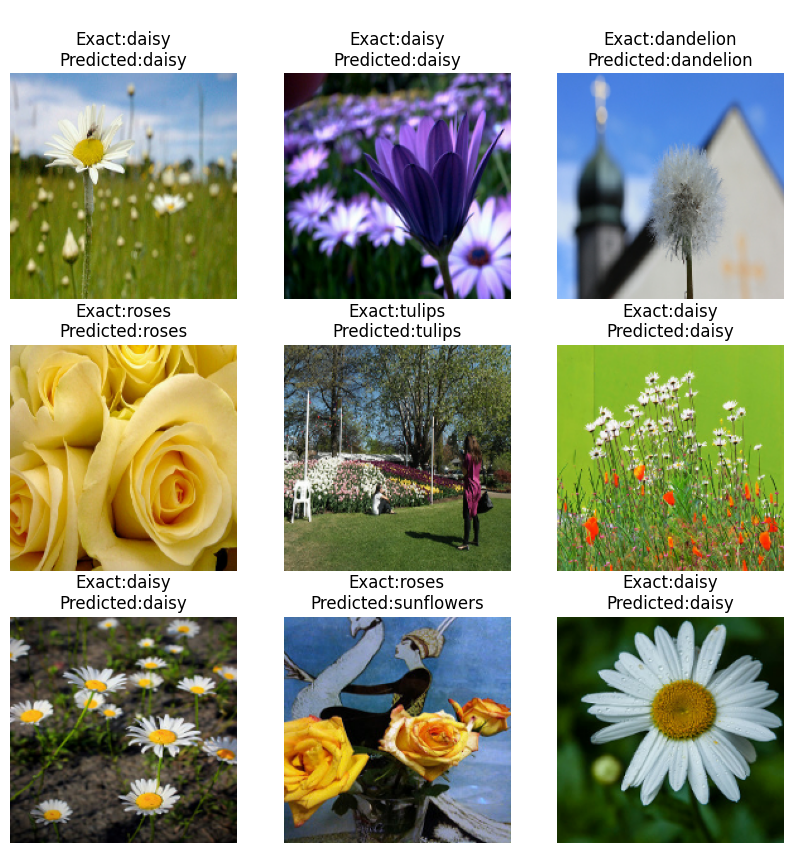

In [55]:
test_data_set(train_ds)

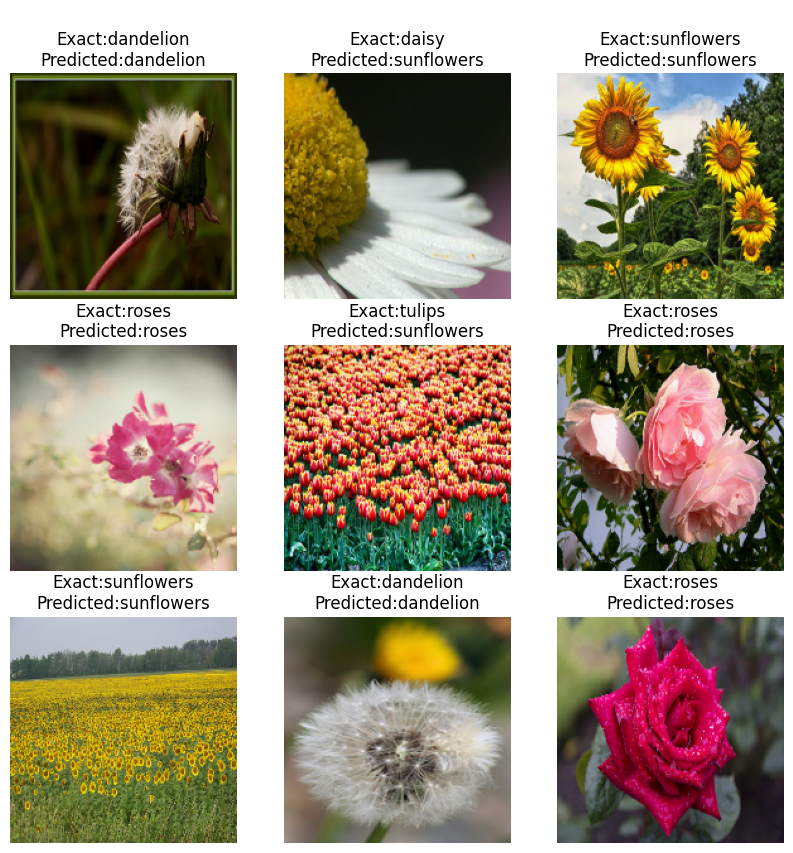

In [56]:
test_data_set(val_ds)

__Observation:__
- The predicted class of the image and the confidence percentage are shown as an output.